In [15]:
import pandas as pd
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error as mae

from xgboost import plot_importance
from matplotlib import pyplot as plt

In [16]:
# increase default plot size
plt.rcParams["figure.figsize"] = (14, 7)

In [17]:
df = pd.read_csv('data/processed/train.csv')

In [18]:
df.shape

(368256, 25)

In [19]:
# add target by shifting load by 7*24 hours (separately for each city!)
df['target'] = df.groupby('city')['load'].shift(-7*24)
df.dropna(inplace = True)

In [20]:
CATEGORICAL_VARIABLES = ['city', 'day_name']

In [21]:
# one-hot-encoding of categorical features
df = pd.get_dummies(df, columns = CATEGORICAL_VARIABLES)

In [22]:
df.head()

,load,time,hour,weekday,day,month,year,dayofyear,hour_sin,hour_cos,...,city_sz,city_whv,city_wob,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,263.365956,2015-01-01 00:00:00,0,3,1,1,2015,1,0.000000,1.000000,...,0,0,0,0,0,0,0,1,0,0
1,259.073621,2015-01-01 01:00:00,1,3,1,1,2015,1,0.269797,0.962917,...,0,0,0,0,0,0,0,1,0,0
2,246.612481,2015-01-01 02:00:00,2,3,1,1,2015,1,0.519584,0.854419,...,0,0,0,0,0,0,0,1,0,0
3,238.313719,2015-01-01 03:00:00,3,3,1,1,2015,1,0.730836,0.682553,...,0,0,0,0,0,0,0,1,0,0
4,237.114390,2015-01-01 04:00:00,4,3,1,1,2015,1,0.887885,0.460065,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df.drop(columns = ['time'], errors='ignore', inplace=True)

In [24]:
# split for training
X = df.drop(columns = ['target'])
y = df['target']

In [25]:
xgb = XGBRegressor(n_jobs = -1)

In [26]:
xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
# prepare validation data
df_valid = pd.read_csv('data/processed/valid.csv')
df_valid['target'] = df_valid.groupby('city')['load'].shift(-7*24)
df_valid.dropna(inplace = True)
df_valid = pd.get_dummies(df_valid, columns = ['city', 'day_name'])
df_valid.drop(columns = ['time'], errors='ignore', inplace=True)
X_valid = df_valid.drop(columns = ['target'])
y_valid = df_valid['target']

In [30]:
y_pred = xgb.predict(X_valid)

In [31]:
mae(y_valid, y_pred) 

# only time features: 8.54419569717932 
# time + lat,long,elevation: 8.510057333432663
# time + geo + daylight: 8.490066271592514

8.490066271592514

In [32]:
mae(y_valid, X_valid.load) 

9.523216319008686

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

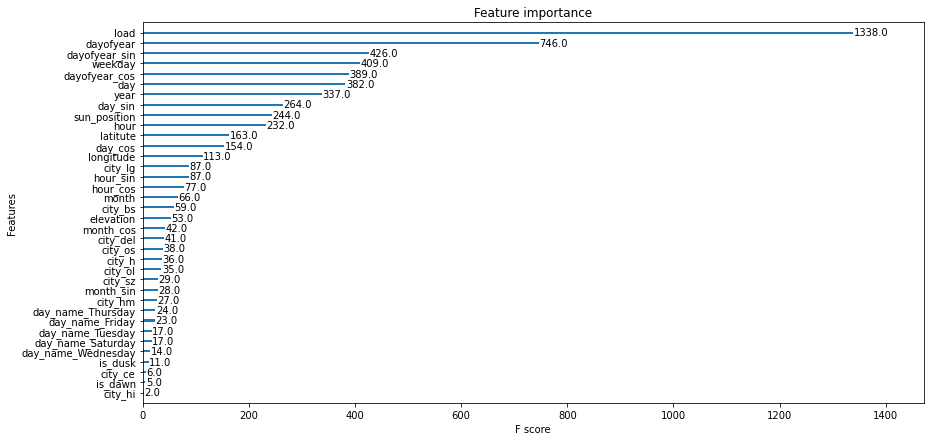

In [33]:
plot_importance(xgb, grid=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

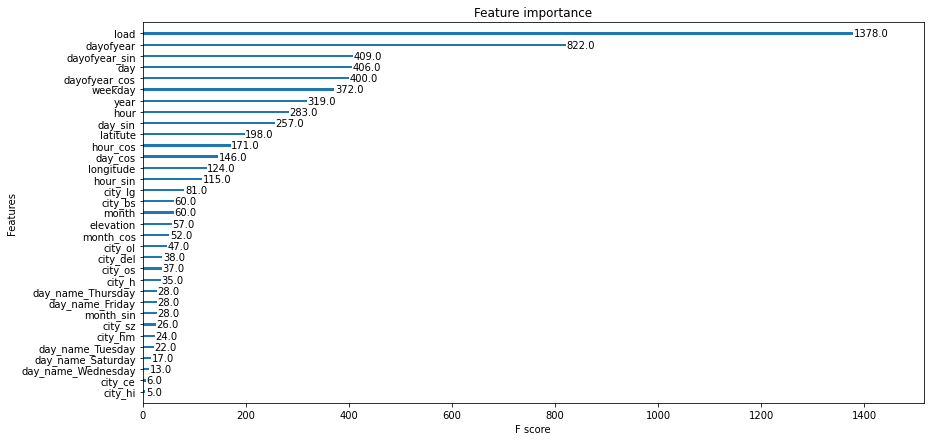

In [85]:
plot_importance(xgb, grid=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

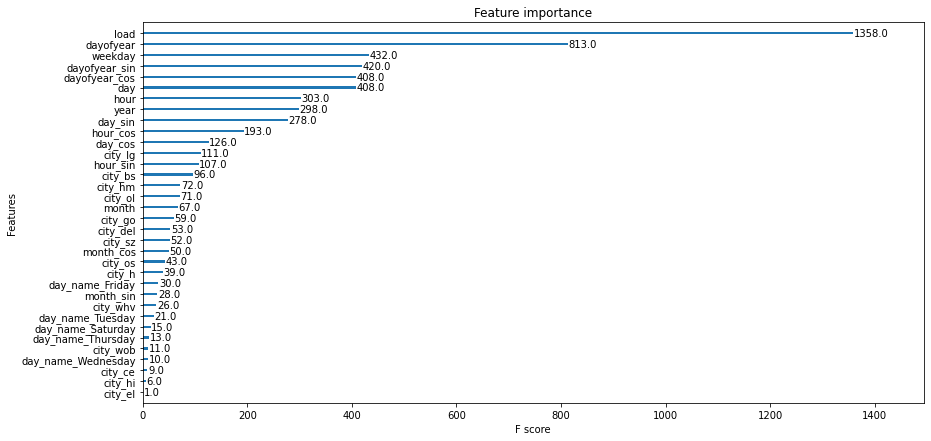

In [60]:
plot_importance(xgb, grid=False)

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lasso = Lasso()

In [37]:
lasso.fit(X, y)

Lasso()

In [38]:
y_pred = lasso.predict(X_valid)

In [39]:
mae(y_valid, y_pred) 

9.56837302044462